Document for Model training



Importing packages

In [151]:
import matplotlib.pyplot as plt
from synDataFunctionality.TreeLib import Tree, genTree
import numpy as np
from synDataFunctionality.genInputFromLabel import labelToInput


Setting Constants

In [152]:
startX = 5
startY = 360
startAngle = 0
starWidth = 15
stopWidth = 3
startLength = 20
bifurcProb = 0.3


Synthetic Angiogram Class: Node

Synthetic Angiogram Class: Tree

Drawing Tree

Executing

In [153]:
tree = Tree(startX, startY, starWidth, startLength, startAngle, stopWidth)
#synAngio = genTree(tree, (736, 736))
#drawTree(synAngio, lab=True)

for i in range(10):
    tree = Tree(startX, startY, starWidth, startLength, startAngle,
                stopWidth, bifurcProb=bifurcProb, angleStdMul=0.05)
    synAngioLab = genTree(tree, (736, 736))
    synAngioInput = labelToInput(synAngioLab)
    #drawTree(synAngioLab, lab=True)
    # drawTree(synAngioInput)


In [154]:
from synDataFunctionality.saveSynData import genSynDat
import torch.utils.data as td
from DataLoaders import SynData

In [155]:
lst = [startX, startY, starWidth, startLength, startAngle, stopWidth]
num = 9

# make num samples
genSynDat("SynDat/SynInput", "SynDat/SynLabel", lst, (736, 736), num)


In [156]:
#make a dataset for synthetic data
SynDataSet = SynData("SynDat/synInput", "SynDat/synLabel")


In [157]:
#Test we can retrieve data from Dataset and illustrate them
test, lab = SynDataSet[0]
print(test.shape)
print(lab.shape)

torch.Size([1, 736, 736])
torch.Size([1, 736, 736])


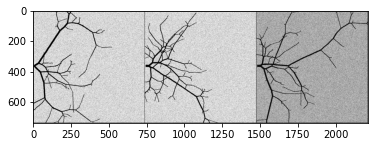

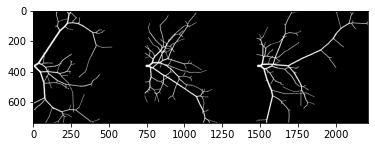

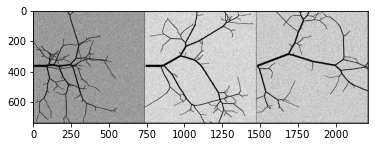

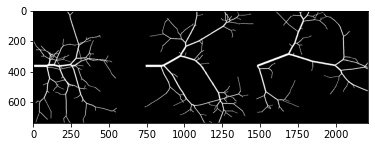

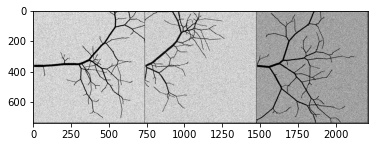

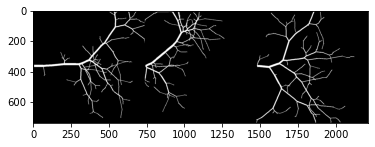

In [158]:
import torchvision

#test that dataloader works, and show images
test_loader = td.DataLoader(SynDataSet, batch_size=3)

testIter = iter(test_loader)
for i in range(len(testIter)):
    imgs, labs = testIter.next()
    grid = torchvision.utils.make_grid(imgs).numpy()[0]
    plt.imshow(grid, cmap="gray", vmin=0, vmax=255)
    plt.show()
    lab_grid = torchvision.utils.make_grid(labs).numpy()[0]
    plt.imshow(lab_grid, cmap="gray", vmin=0, vmax=1)
    plt.show()

In [159]:
#Test transformations work correctly on dataloader:
from torchvision.transforms import RandomVerticalFlip, RandomHorizontalFlip, ColorJitter, CenterCrop, Normalize
from torchvision.transforms.functional import rotate
import torchvision

t_both = [RandomHorizontalFlip(p=0.5),  RandomVerticalFlip(p=0.5)]
#Maybe normalize imgs automatically in dataSet

In [160]:
TransDataSet = SynData("SynDat/synInput", "SynDat/synLabel", transforms_both=t_both)#, transforms_train=t_dat)

img, lab = TransDataSet[0]
print(img.shape)
print(lab.shape)

torch.Size([1, 736, 736])
torch.Size([1, 736, 736])


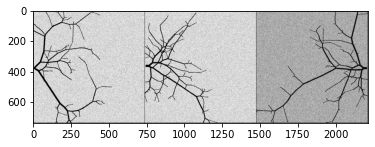

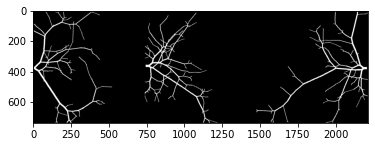

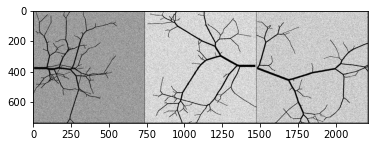

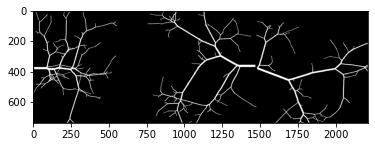

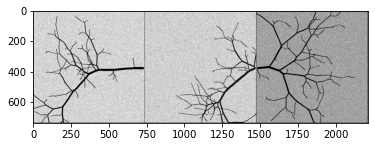

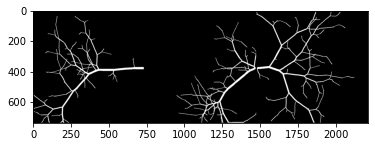

In [161]:
import torchvision
import numpy as np

#test that dataloader works, and show images
trans_loader = td.DataLoader(TransDataSet, batch_size=3)

transIter = iter(trans_loader)
for i in range(len(transIter)):
    imgs, labs = transIter.next()
    grid = torchvision.utils.make_grid(imgs).numpy()[0]
    #print(np.amax(np.array(imgs)))
    #print(np.amin(np.array(imgs)))
    plt.imshow(grid+1, cmap="gray", vmin=0, vmax=255)
    plt.show()
    lab_grid = torchvision.utils.make_grid(labs).numpy()[0]
    plt.imshow(lab_grid, cmap="gray", vmin=0, vmax=1)
    plt.show()

In [162]:
#kill generated files such that we diminish clutter
from synDataFunctionality.saveSynData import order_66

order_66("SynDat/synInput", "SynDat/synLabel")
